I have the MNIST handwritten digits image database in the form of a CSV file on my machine. A single record in the CSV file represents the pixel intensity values for our grayscale handwritten digit images. 

Original MNIST dataset is available here at this URL yann.lecun .com /exdb/mnist. 

Let's take a look at this data frame of our image pixel values. T

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans

In [3]:
mnist_data = pd.read_csv('../datasets/train.csv')

mnist_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


he first column of this data frame is the label associated with the image. This is the number represented by the handwritten digit image. 


All of the other columns in this record represent pixel intensity values and you can see that the last column here is pixel783. 


There are a total of 784 pixels in each image. Every image in the MNIST handwritten dataset is 28 pixels by 28 pixels. Twenty-eight multiplied by 28 gives you 784 pixels. 


These are single-channel grayscale images. If you take a look at the shape of the data frame, you'll see that there are a total of 42, 000 images, 42, 000 rows, and every image has 785 columns, 1 column for the label, and the remaining 784 columns for the pixel intensity values. 

In [4]:
mnist_data.shape

(42000, 785)

Let's take a look at the unique label values available in our dataset called the unique function and let's display them in a sorted order. 

In [5]:
sorted(mnist_data['label'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

You can see that these labels are numbers from 0 through 9. These are the numbers represented by our images. While clustering is an unsupervised learning technique, let's go ahead and drop the label column from our data frame. 

In [6]:
mnist_features = mnist_data.drop('label', axis=1)

mnist_features.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So now we have just the features, all of the pixel intensity values. We can separately assign the labels to a different kind of series object called mnist_labels. So these are the labels from our original data frame. 

In [7]:
mnist_labels = mnist_data['label']

mnist_labels.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

We'll now take a look at some of these images that we know what we are working with. I'm going to set up this little helper function here called display_image. This takes in as an input parameter the index of the image in the data frame. This is the image that we want to display. We'll first print out the digit or the label corresponding to the image and we'll call matplotlib to display the image single row in our data frame is a 1-D array or a vector. An image, of course, has a height and a width so I'm going to reshape a row to be 28 pixels by 28 pixels, that is the image that will display. Go ahead and call display_image on the image at the fifth index in our data frame. 

In [8]:
def display_image(index):
    print("Digit: ", mnist_labels[index])
        
    plt.imshow(mnist_features.loc[index].values.reshape(28,28), cmap='Greys')

Digit:  0


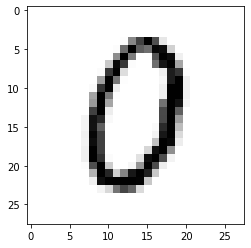

In [9]:
display_image(5)

You can see that this image is the handwritten digit 0 and it has the label 0. Go ahead and display one more image as well, the 1 at index 500, and you can see that this is an image of the handwritten digit 6.

Digit:  6


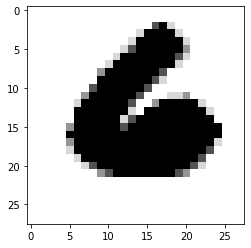

In [10]:
display_image(500)

Performing K-means clustering on image data is no different from other kinds of data. Instantiate the KMeans estimator object and clusters here is equal to 10 because there are 10 digits, 0 through 9. 



We run for 1, 000 iterations and we call fit on the mnist_features data frame. Once our model has clustered the underlying data, we can take a look at the cluster_centers, but this is really meaningless because these are all matrices with 784 pixels. 



If you take a look at the shape of the centroids, you'll see that we have 10 cluster centers and each cluster center has 784 pixels. So how do we visualize what these cluster centers look like.


In [11]:
kmeans_model = KMeans(n_clusters=10, max_iter=1000).fit(mnist_features)

In [12]:
kmeans_centroids = kmeans_model.cluster_centers_

kmeans_centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
kmeans_centroids.shape

(10, 784)

Remember that each of these cluster centers can be thought of as an image, which means we can plot these images using matplotlib. I'm going to set up a little grid in matplotlib and I'm going to iterate through every centroid image and display this image using plt.imshow. 



We cluster the image data by representing images in the form of one-dimensional arrays. The centroids are also one-dimensional arrays or vectors means that you have to reshape them to a 2-D format to display them using matplotlib. That is why the reshape 28 by 28 exists here. And here are the images that make up the cluster centers of our mnist dataset.





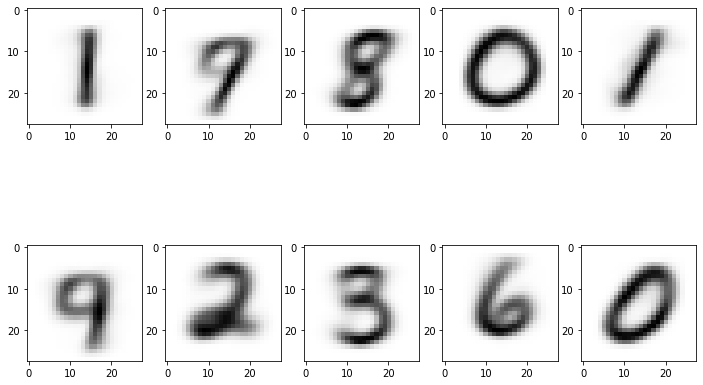

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

for centroid in range(len(kmeans_centroids)):
    plt.subplot(2, 5, centroid + 1)

    plt.imshow(kmeans_centroids[centroid].reshape(28, 28), cmap='Greys')

You can see that these are images which are very close to handwritten digits. You can see this first image here, this could be a three or maybe an eight. The last image here is clearly a 0. It's very clear that all of the digits from 0 through 9 are not represented here. There are two nines, two ones, two zeros, but you can see that these are all digits. 



We cluster these images into 10 different clusters, which means our K-means model has 10 unique labels to assign to these clusters. Now that we have a clustering model, let's see if we can use this for prediction. 

In [15]:
np.unique(kmeans_model.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Let's sample some of the original rows from our original mnist data data frame. I'm going to sample 10 rows here and assign it to the mnist_test data frame. I'll separate out the features into a separate data frame called mnist_test_features and the labels as a separate series object called mnist_test_labels. 

In [16]:
mnist_test = mnist_data.sample(10, replace=False)

mnist_test_features = mnist_test.drop('label', axis=1)

mnist_test_labels = mnist_test['label']

Here are the labels associated with the 10 digits in our test data frame. 

In [17]:
mnist_test_labels

26200    9
15078    6
15510    0
4333     9
38550    6
18621    1
25538    9
28029    1
28419    4
40245    1
Name: label, dtype: int64

There are a number of sixes, some twos, a 0, a 7. Let's convert these labels from a panda series object to an array format. 

In [18]:
mnist_test_labels = np.array(mnist_test_labels)

mnist_test_labels

array([9, 6, 0, 9, 6, 1, 9, 1, 4, 1], dtype=int64)

Mnist_test_labels is now a simple NumPy array. Call the predict function on our kmeans_model and pass in the mnist_test_features to predict the clusters we'll store in a variable called pred_clusters. 

In [19]:
pred_clusters = kmeans_model.predict(mnist_test_features)

In order to see how many of the predicted clusters map to actual digits, let's set up a data frame of the actual digit and the predicted cluster so that we can view this information side by side. Remember that the predicted cluster values are not actual numeric digits, they're just labels assigned to clusters. We'll see whether the actual digit matches the image of the predicted cluster. 

In [20]:
pred_results = pd.DataFrame({'actual_digit': mnist_test_labels,
                             'pred_cluster': pred_clusters})

pred_results.head(10)

,actual_digit,pred_cluster
0,9,5
1,6,8
2,0,5
3,9,5
4,6,8
5,1,0
6,9,5
7,1,0
8,4,5
9,1,4


Here we have the actual digit and the predicted cluster side by side in the single data frame. When the actual original digit was six, notice that the predicted cluster was seven and the image corresponding to cluster seven is this image that you see highlighted here on screen. This image is clearly a six, which means that our K-means clustering model has assigned the right cluster for these two images. Let's take a look at another image here. The actual digit is two. The predicted cluster is cluster six and you can see that this image associated with cluster six is clearly a two. One more correctly predicted example, the actual digit is 3 assigned to cluster 0 and the image associated with cluster 0 is clearly a 3. But observe that this actual digit 5 here is also assigned to cluster 0. This is an image that has been wrongly assigned. 

### MiniBatchKMeans is faster for larger datasets

We've performed K-means on the image data. Performing MiniBatchKMeans is very straightforward. You simply change the estimator object and you specify a batch size. We've chosen a batch size of 100.

Num clusters here is still 10 and corresponds to 10 digits.

In [21]:
minibatch_kmeans_model = MiniBatchKMeans(n_clusters=10, max_iter=10000, batch_size=100).fit(mnist_features)

Clustering our image data will give us 10 clusters and here are the centroids of those clusters.

In [22]:
minibatch_kmeans_centroids = kmeans_model.cluster_centers_

minibatch_kmeans_centroids.shape

(10, 784)

These centroids are meaningful when you visualize them using matplotlib. 

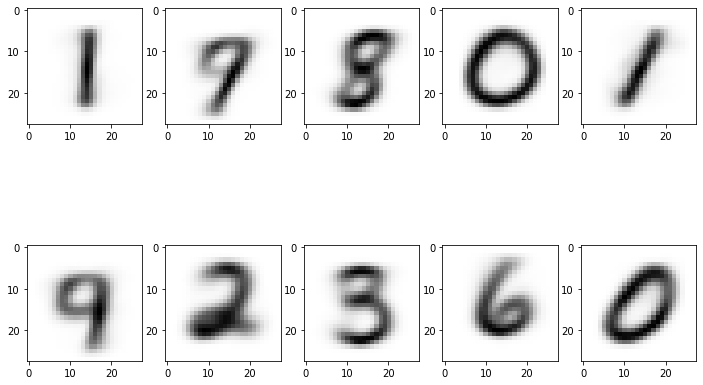

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))

for centroid in range(len(minibatch_kmeans_centroids)):
    plt.subplot(2, 5, centroid + 1)

    plt.imshow(minibatch_kmeans_centroids[centroid].reshape(28, 28), cmap='Greys')

And here you can see the centroids of clusters produced using minibatch_kmeans. You can see that these images are very close, almost identical to the centroids of clusters produced using K-means.